# Pallavi P Bolar

## Task 1: Linear Regression

### Problem Statement : Predict the percentage of a student based on the number of study hours.
This is a simple linear regression task as it involves just 2 variables.

In [1]:
#Importing libraries required for data manipulation and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data stored in the same folder as this file
data = pd.read_csv('student_scores - student_scores.csv')

In [3]:
# Checking the first five rows of the dataframe
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#to check the number of rows and columns present in the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# To check the statisical information of the numerical columns present in the dataframe
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

Text(0.5, 0, 'Hours Studied Per Day')

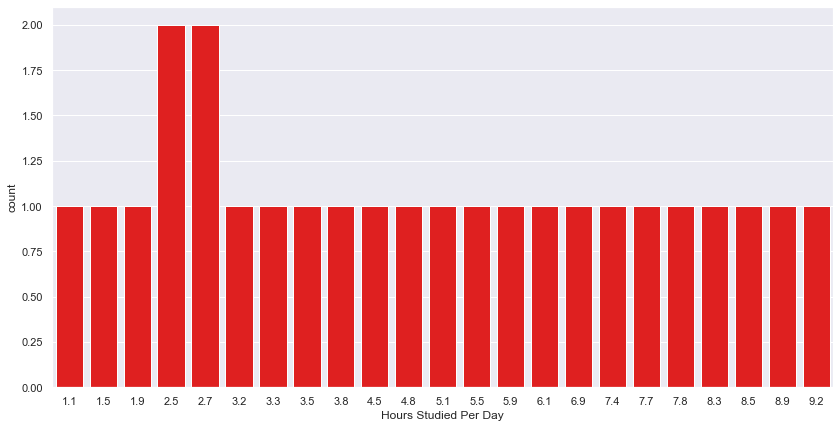

In [6]:
#analyzing the total number of hours studied by the students
plt.figure(figsize=(14,7))
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.countplot(x='Hours',data = data,color='red')
plt.xlabel('Hours Studied Per Day')

#### Number of hours studied by the student ranges from 1.1 to 9.2 

Text(0, 0.5, 'Percentage')

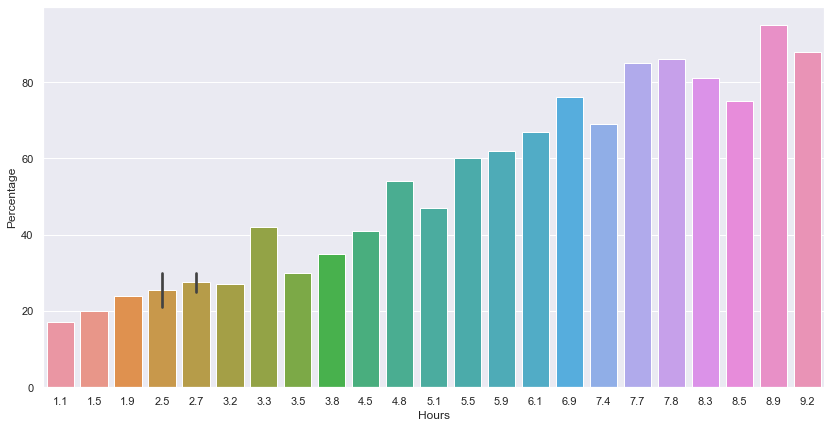

In [7]:
#analyzing the hours studied per day and percentage scored by the student
plt.figure(figsize=(14,7))
sns.set_context('notebook')
sns.barplot(x='Hours',y='Scores',data=data)
plt.ylabel('Percentage')

#### The above plot shows that the percentage increases when the hours studied by the student increases

Text(0.5, 1, 'Hours Vs Percentage')

<Figure size 1008x504 with 0 Axes>

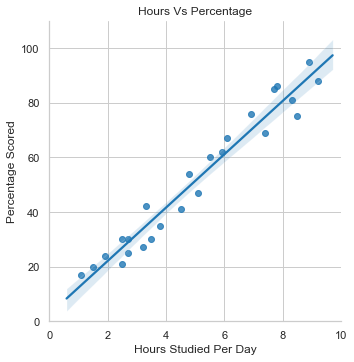

In [8]:
plt.figure(figsize=(14,7))
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.lmplot(x='Hours',y='Scores',data=data)
plt.xlim(0,10)
plt.ylim(0,110)
plt.xlabel('Hours Studied Per Day')
plt.ylabel('Percentage Scored')
plt.title('Hours Vs Percentage')

##### There's a positive correlation between the two variables

## Training Data
We'll split our data into training and testing sets. We'll set the variable X equal to 'Hours' column and y equal to 'Scores' column.

In [9]:
# scikit-learn expect data to be in a two-dimensional array or matrix
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1].values  
y = data.iloc[:, 1].values

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4) 

## Training the Model

In [11]:
#Importing Linear Regression model from Sci-kit learn
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression() #creating an instance of LinearRegression() model named linear_reg
linear_reg.fit(X_train,y_train) #Adding training data to our model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting Test Data

In [12]:
#Predicting the percentage by passing X_test to our model i.e Hours studied per day
predictions = linear_reg.predict(X_test) 
predictions

array([16.08577234, 25.80153874, 27.74469202, 82.15298388, 48.14780147,
       33.57415187, 60.77829779, 87.98244372, 19.9720789 , 54.94883795])

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df

,Actual,Predicted
0,20,16.085772
1,21,25.801539
2,25,27.744692
3,81,82.152984
4,54,48.147801
5,42,33.574152
6,67,60.778298
7,95,87.982444
8,24,19.972079
9,60,54.948838


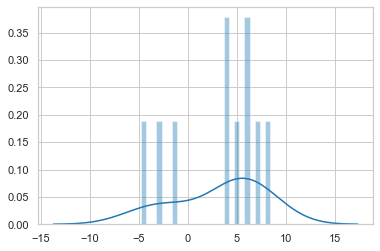

In [14]:
#Plotting residuals i.e the difference between y_test and predictions
sns.distplot((y_test-predictions),bins=25)

##### Our residuals look normally distributed which means our model was a good choice for the data

Text(0.5, 30.49999999999995, 'y_test Vs Predictions')

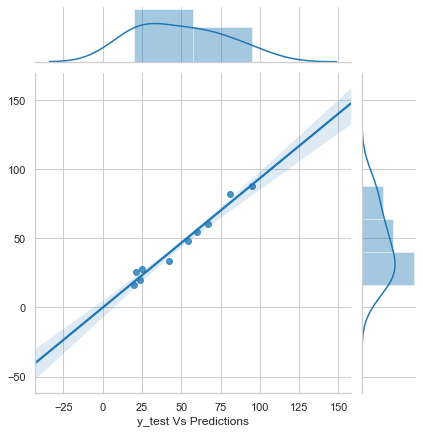

In [15]:
sns.jointplot(y_test,predictions,kind='reg')
sns.set_context('notebook')
plt.xlabel('y_test Vs Predictions')

## Evaluating the Model

#### We'll evaluate our model by using a metric called Mean Absolute Error. Mean Absolute Error(MAE) is the average of all absolute errors.

In [16]:
from sklearn import metrics 
print('Mean Absolute Error :',metrics.mean_absolute_error(y_test,predictions))

Mean Absolute Error : 4.9209830601342395


##### The value of MAE must be smaller for your model to be more accurate

In [17]:
metrics.explained_variance_score(y_test,predictions)

0.9720921928540869

## Making predictions with new data by using our model

In [18]:
hours = np.array(9.25).reshape(-1, 1)
pred = linear_reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 91.38296196520709


#### Conclusion: Our model predicted if a student studies for 9.25 hours per day then he may score 91%